In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Loading CSV file For cleaning and analysis purpose
df = pd.read_csv('/content/drive/MyDrive/Datasets/ecommerce_delivery_data.csv')
df.head(5)

,order_id,order_datetime,pickup_area,drop_area,distance_km,estimated_time_min,order_value,festival_flag,delivery_agent_id,traffic_level,weather_condition,delivery_time_min
0,ORD100000,2023-10-21 03:01:00,Goregaon,Thane,2.19,15,605.78,No,AG22,Medium,Clear,7.10
1,ORD100001,2023-10-24 08:15:00,Goregaon,Bandra,4.78,15,292.83,No,AG169,Low,Rainy,14.98
2,ORD100002,2023-10-08 04:47:00,Borivali,Thane,3.79,18,406.79,No,AG248,High,Rainy,16.60
3,ORD100003,2023-10-04 21:47:00,Kurla,Powai,3.19,15,806.46,No,AG157,Medium,Clear,9.35
4,ORD100004,2023-10-29 17:05:00,Colaba,Bandra,1.20,20,272.83,No,AG277,High,Clear,9.38


In [ ]:
#checking dataset
df.shape

(5000, 12)

In [ ]:
df.dtypes

,0
order_id,object
order_datetime,object
pickup_area,object
drop_area,object
distance_km,float64
estimated_time_min,int64
order_value,float64
festival_flag,object
delivery_agent_id,object
traffic_level,object


In [ ]:
#Checking null values in dataset
df.isnull().sum()

,0
order_id,0
order_datetime,0
pickup_area,100
drop_area,100
distance_km,100
estimated_time_min,0
order_value,100
festival_flag,0
delivery_agent_id,0
traffic_level,100


In [ ]:
#Checking percentage of nan values
df.isnull().sum()/len(df)*100

,0
order_id,0.0
order_datetime,0.0
pickup_area,2.0
drop_area,2.0
distance_km,2.0
estimated_time_min,0.0
order_value,2.0
festival_flag,0.0
delivery_agent_id,0.0
traffic_level,2.0


**Handling Missing Values**

As the Nan values is around 2% so we can fill that values with median as it wont create a lot of deviation in the data


In [ ]:
#Filling Areas missing value with unknown
df['pickup_area'].fillna('unknown' , inplace = True)
df['drop_area'].fillna('unknown' , inplace = True)

#Filling distance and order value with median
df['distance_km'].fillna(df['distance_km'].median() , inplace = True)
df['order_value'].fillna(df['order_value'].median() , inplace = True)

#Filling Traffic level with mode of data
df['traffic_level'].fillna(df['traffic_level'].mode()[0],inplace = True)

#checking again
df.isnull().sum()

<ipython-input-38-c1b045b42121>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pickup_area'].fillna('unknown' , inplace = True)
<ipython-input-38-c1b045b42121>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
order_id,0
order_datetime,0
pickup_area,0
drop_area,0
distance_km,0
estimated_time_min,0
order_value,0
festival_flag,0
delivery_agent_id,0
traffic_level,0


In [ ]:
# prompt: generate code to download modified dataset

from google.colab import files
df.to_csv('modified_ecommerce_delivery_data.csv')
files.download('modified_ecommerce_delivery_data.csv')

Modifying Dataset
- adding columns according to need


In [ ]:
# Add delivery_delay column (actual - estimated)
df['delivery_delay_min'] = df['estimated_time_min'] - df['delivery_time_min']

# Time of day
def time_of_day(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'
df['order_datetime'] = pd.to_datetime(df['order_datetime'])

df['order_hour'] = df['order_datetime'].dt.hour
df['time_of_day'] = df['order_hour'].apply(time_of_day)
# Check final structure
df.head()


,order_id,order_datetime,pickup_area,drop_area,distance_km,estimated_time_min,order_value,festival_flag,delivery_agent_id,traffic_level,weather_condition,delivery_time_min,delivery_delay_min,order_hour,time_of_day
0,ORD100000,2023-10-21 03:01:00,Goregaon,Thane,2.19,15,605.78,No,AG22,Medium,Clear,7.10,7.90,3,Night
1,ORD100001,2023-10-24 08:15:00,Goregaon,Bandra,4.78,15,292.83,No,AG169,Low,Rainy,14.98,0.02,8,Morning
2,ORD100002,2023-10-08 04:47:00,Borivali,Thane,3.79,18,406.79,No,AG248,High,Rainy,16.60,1.40,4,Night
3,ORD100003,2023-10-04 21:47:00,Kurla,Powai,3.19,15,806.46,No,AG157,Medium,Clear,9.35,5.65,21,Night
4,ORD100004,2023-10-29 17:05:00,Colaba,Bandra,1.20,20,272.83,No,AG277,High,Clear,9.38,10.62,17,Evening


In [ ]:
#Saving modified dataframse as csv file
df.to_csv("delivery_data_cleaned.csv", index=False)

#downloading csv file
from google.colab import files
files.download("delivery_data_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Plotting Graps to derive insights**

1. Checking Delivery Delays

2. Impact of traffic , festival etc on delivery

3. Order value trends



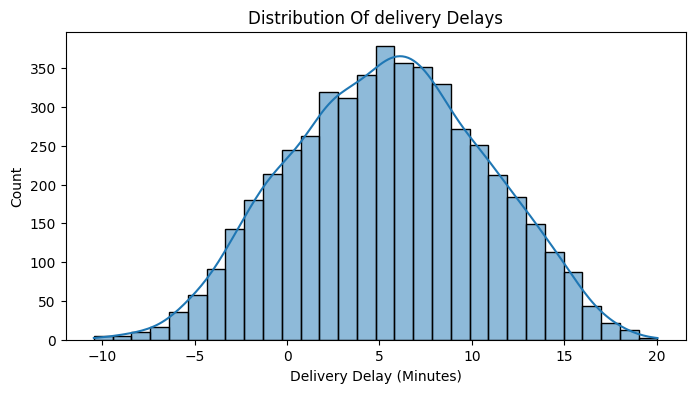

In [ ]:
#Distribution Of delivery Delays
plt.figure(figsize=(8,4))
sns.histplot(df['delivery_delay_min'] , bins = 30 , kde =True )
plt.title('Distribution Of delivery Delays')
plt.xlabel('Delivery Delay (Minutes)')
plt.show()

Text(0.5, 0, 'Weather Condition')

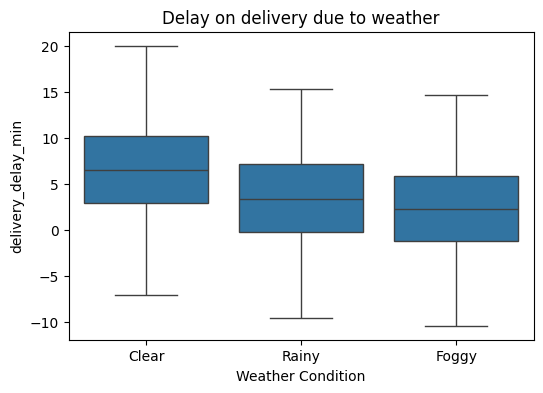

In [ ]:
#Delay on delivery due to weather

plt.figure(figsize = (6,4))
sns.boxplot(data = df , x = 'weather_condition' , y = 'delivery_delay_min')
plt.title('Delay on delivery due to weather')
plt.xlabel('Weather Condition')

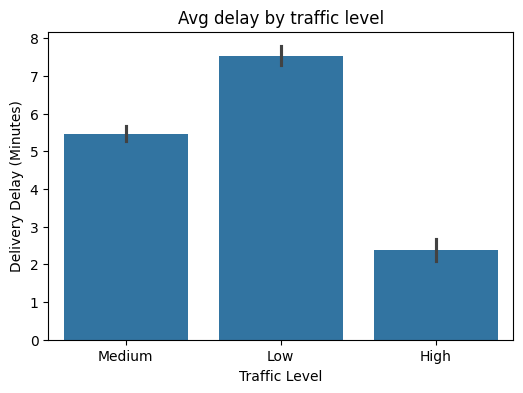

In [ ]:
#Avg delay by traffic level

plt.figure(figsize = (6,4))
sns.barplot(data = df,  x = 'traffic_level' , y = 'delivery_delay_min')
plt.title('Avg delay by traffic level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Delay (Minutes)')
plt.show()

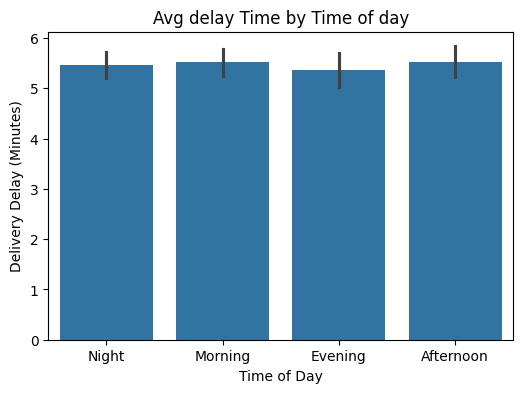

In [ ]:
#Avg delay Time by Time of day
plt.figure(figsize = (6,4))
sns.barplot(data = df,  x = 'time_of_day' , y = 'delivery_delay_min')
plt.title('Avg delay Time by Time of day')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Delay (Minutes)')
plt.show()

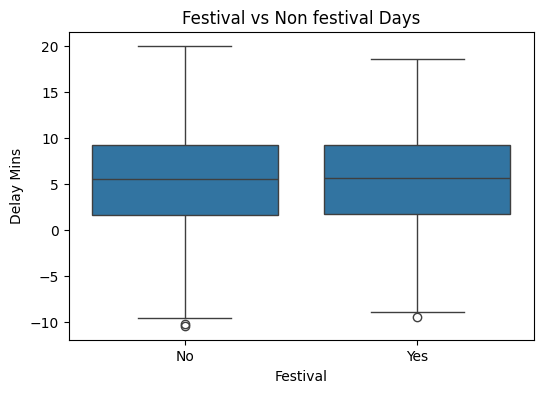

In [ ]:
#Festival vs Non festival Days
plt.figure(figsize = (6,4))
sns.boxplot(data = df , x = 'festival_flag' , y = 'delivery_delay_min')
plt.title('Festival vs Non festival Days')
plt.xlabel('Festival')
plt.ylabel('Delay Mins')
plt.show()

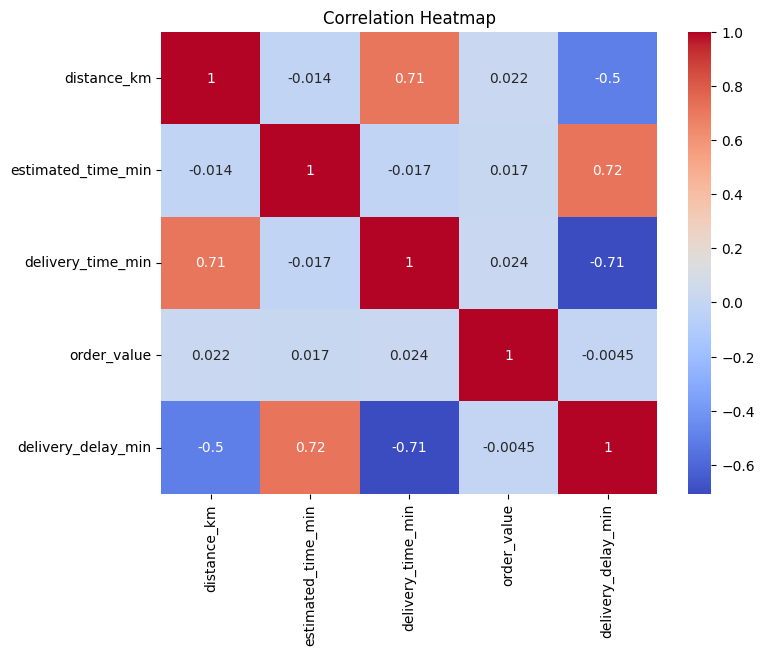

In [ ]:
#Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['distance_km', 'estimated_time_min', 'delivery_time_min', 'order_value', 'delivery_delay_min']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#**Key Insights from EDA**

1. Average Delivery delay is 5 minutes

2. When do delays peek by traffic ?
-> Delays peek during low traffic
  low traffic occurs during Night and early Morning
  possible reasons is maybe fewer delivery agents , less restaurants may open late or working slowly due to less workers, long distance orders.

3. Impact of festival on delays
-> Days having not festival have more delays maybe due to traffic issues or crowd at cloud delivery stations.

4. Delivery delay due to distance ?
-> Heatmap shows positive correlation between distance and delivery time (maybe due to traffic/weather)



